# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

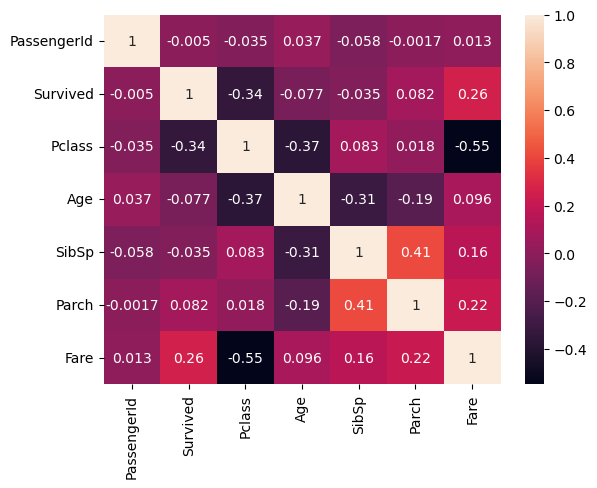

In [5]:
correlation=df.corr()
sns.heatmap(correlation,annot=True)

#### Converting Categorical Features 

In [6]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
label=LabelEncoder()

In [10]:
df['Gender']=label.fit_transform(df['Sex'])

In [11]:
df['Embark']=label.fit_transform(df['Embarked'])

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Embark
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0


# Data Cleaning

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Gender           0
Embark           0
dtype: int64

<Axes: >

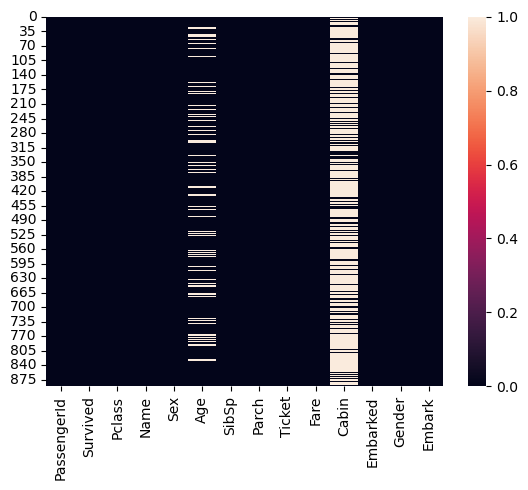

In [14]:
sns.heatmap(df.isnull())

<Axes: >

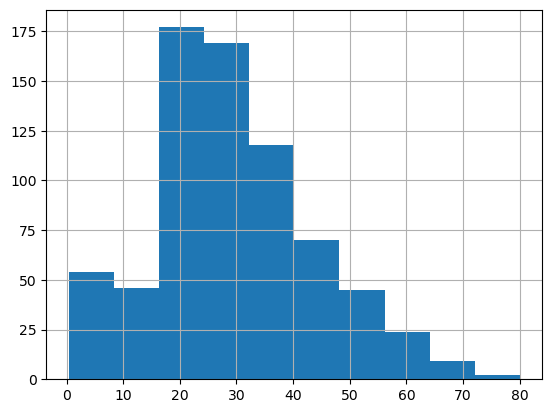

In [15]:
df['Age'].hist()

In [16]:
df['Age']=df['Age'].fillna(df['Age'].mean())

<Axes: >

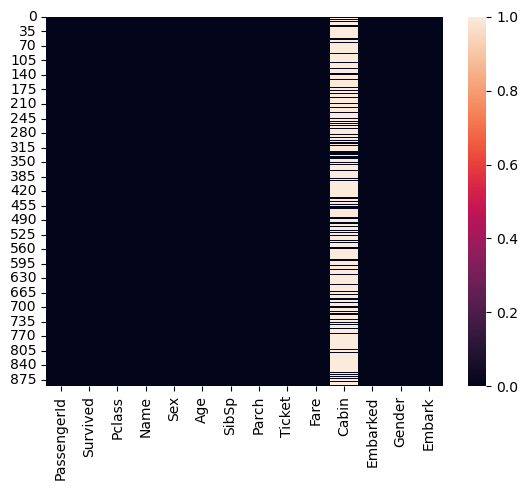

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.drop(['Cabin'],axis=1,inplace=True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Embark
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Gender       891 non-null    int32  
 12  Embark       891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 83.7+ KB


In [21]:
df.drop(['Embarked','Sex','PassengerId','Name','Ticket','Parch','SibSp','Age'],axis=1,inplace=True)

In [22]:
df

,Survived,Pclass,Fare,Gender,Embark
0,0,3,7.2500,1,2
1,1,1,71.2833,0,0
2,1,3,7.9250,0,2
3,1,1,53.1000,0,2
4,0,3,8.0500,1,2
...,...,...,...,...,...
886,0,2,13.0000,1,2
887,1,1,30.0000,0,2
888,0,3,23.4500,0,2
889,1,1,30.0000,1,0


# EDA

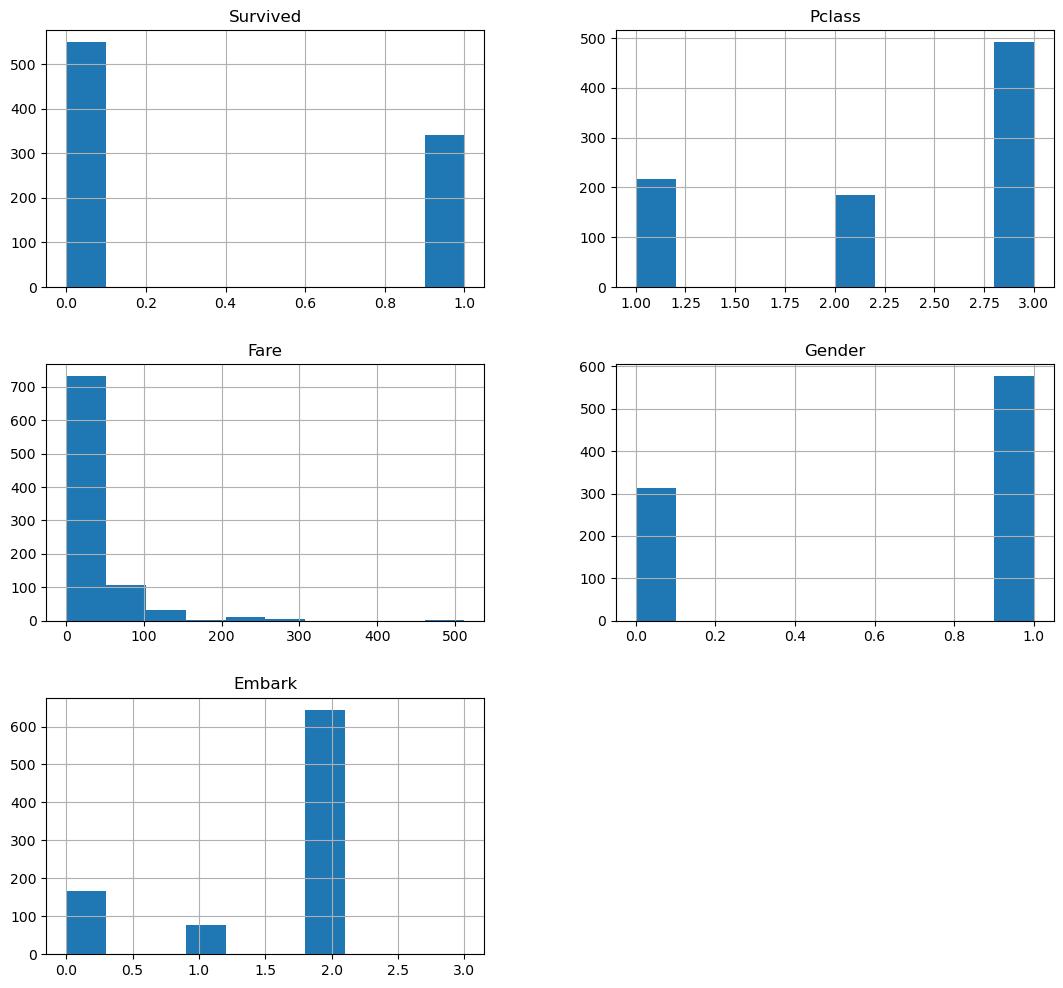

In [23]:
df.hist(figsize=(13,12))
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

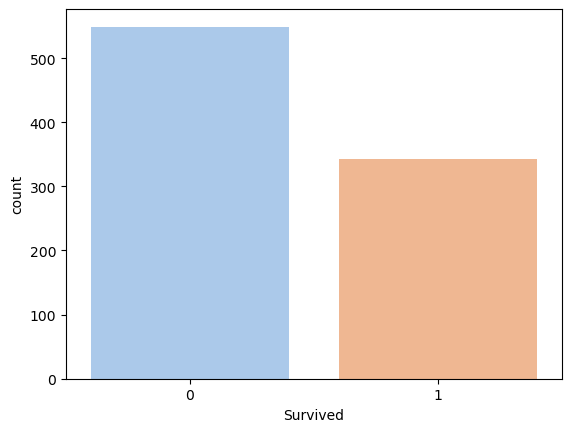

In [24]:
sns.countplot(data=df,x='Survived',palette='pastel')

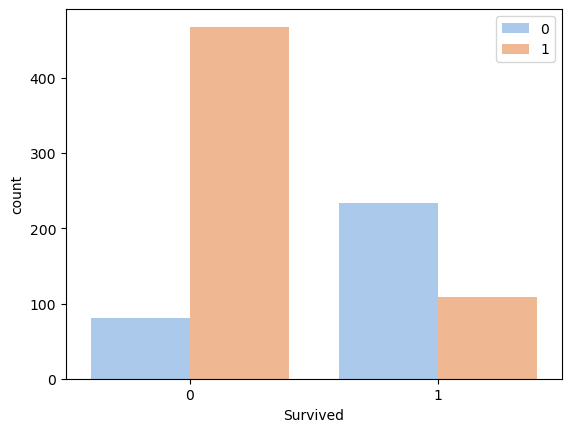

In [25]:
sns.countplot(data=df,x='Survived',palette='pastel',hue='Gender')
plt.legend()

<Axes: >

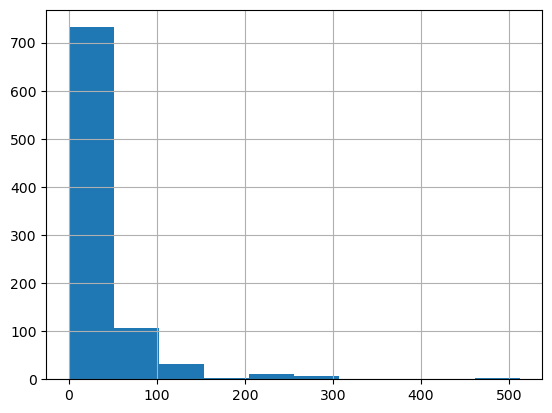

In [26]:
df['Fare'].hist()

# Build Model




In [27]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [29]:
model=RandomForestClassifier(n_estimators=55,random_state=2,max_depth=5)

In [30]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=55, random_state=2)

# Evaluate Model

In [31]:
model.score(X_test,y_test)

0.7932960893854749

In [32]:
pred=model.predict(X_test)
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

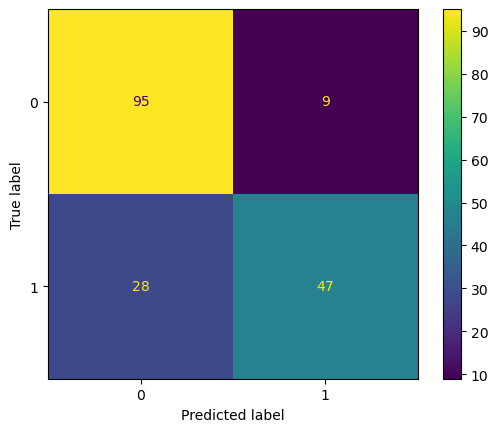

In [33]:
matrix=confusion_matrix(y_test,pred)
display=ConfusionMatrixDisplay(matrix)
display.plot()

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       104
           1       0.84      0.63      0.72        75

    accuracy                           0.79       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



In [35]:
outcomes=pd.DataFrame({'Actual':y_test,'Predict':pred})
outcomes

,Actual,Predict
865,1,1
812,0,0
310,1,1
569,1,0
294,0,0
...,...,...
283,1,0
593,0,1
8,1,1
837,0,0


array([[<Axes: title={'center': 'Actual'}>,
        <Axes: title={'center': 'Predict'}>]], dtype=object)

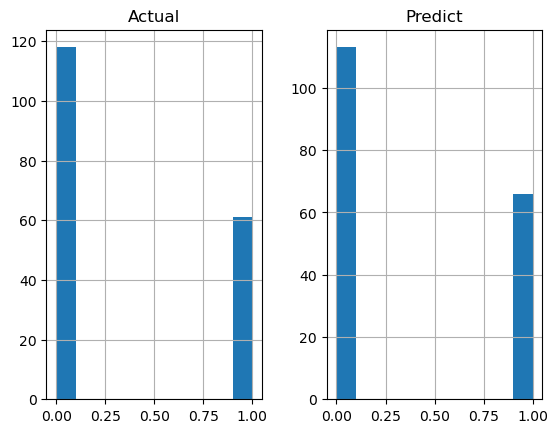

In [199]:
outcomes.hist()


# Evaluate &

In [381]:
model1=tree.DecisionTreeClassifier(max_depth=9)

In [36]:
train=cross_val_score(model,X,y)
train

array([0.7877095 , 0.79775281, 0.83707865, 0.78089888, 0.79775281])

In [37]:
validate=cross_validate(model,X,y)
validate['test_score']

array([0.7877095 , 0.79775281, 0.83707865, 0.78089888, 0.79775281])

In [38]:
predict=cross_val_predict(model,X,y)

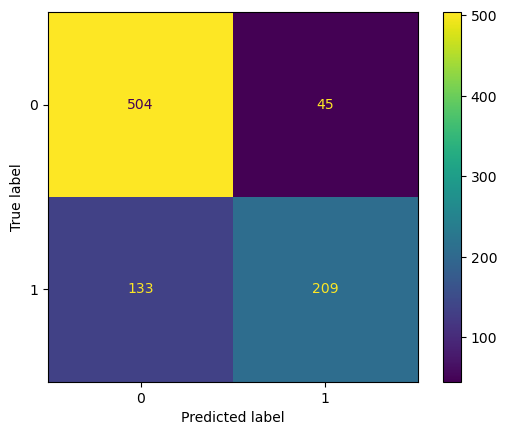

In [39]:
matrix=confusion_matrix(y,predict)
display=ConfusionMatrixDisplay(matrix)
display.plot()

In [40]:
print(classification_report(y,predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       549
           1       0.82      0.61      0.70       342

    accuracy                           0.80       891
   macro avg       0.81      0.76      0.78       891
weighted avg       0.80      0.80      0.79       891

